<a href="https://colab.research.google.com/github/sun-in-universe/blue_dot/blob/main/%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80%2C_%EC%86%90%EC%8B%A4%ED%95%A8%EC%88%98%2C_%EC%97%AD%EC%A0%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [65]:
#10개의 특성 442개, target도 442

print(diabetes.data.shape, diabetes.target.shape)

(442, 10) (442,)


In [66]:
diabetes.data[:3]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187239, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632753, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567042, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286131, -0.02593034]])

In [67]:
diabetes.target[:3]

array([151.,  75., 141.])

In [68]:
#처음부터 끝까지 불러오되, 인덱스 2번만 불러와라! = 3번째값만 불러짐
diabetes.data[:,2]

array([ 0.06169621, -0.05147406,  0.04445121, -0.01159501, -0.03638469,
       -0.04069594, -0.04716281, -0.00189471,  0.06169621,  0.03906215,
       -0.08380842,  0.01750591, -0.02884001, -0.00189471, -0.02560657,
       -0.01806189,  0.04229559,  0.01211685, -0.0105172 , -0.01806189,
       -0.05686312, -0.02237314, -0.00405033,  0.06061839,  0.03582872,
       -0.01267283, -0.07734155,  0.05954058, -0.02129532, -0.00620595,
        0.04445121, -0.06548562,  0.12528712, -0.05039625, -0.06332999,
       -0.03099563,  0.02289497,  0.01103904,  0.07139652,  0.01427248,
       -0.00836158, -0.06764124, -0.0105172 , -0.02345095,  0.06816308,
       -0.03530688, -0.01159501, -0.0730303 , -0.04177375,  0.01427248,
       -0.00728377,  0.0164281 , -0.00943939, -0.01590626,  0.0250506 ,
       -0.04931844,  0.04121778, -0.06332999, -0.06440781, -0.02560657,
       -0.00405033,  0.00457217, -0.00728377, -0.0374625 , -0.02560657,
       -0.02452876, -0.01806189, -0.01482845, -0.02991782, -0.04

In [69]:
# import pandas as pd

# one_dim_diabetes = diabetes.flatten()
# df = pd.DataFrame(one_dim_diabetes)

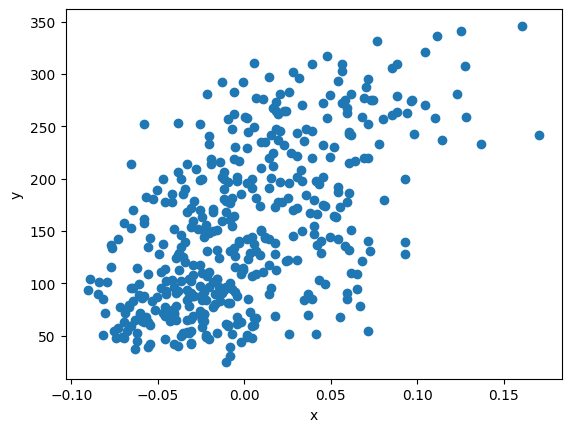

In [70]:
import matplotlib.pyplot as plt

#3번째 특성과 타겟과의 관계
plt.scatter(diabetes.data[:,2], diabetes.target)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [71]:
x = diabetes.data[:,2]
y = diabetes.target

# 2. 선형회귀 구현하기 - 경사하강법의 적용

### 2.1 예측값으로 올바른 모델찾기

In [72]:
# W와 b초기화 하기

w = 1.0
b = 1.0

In [73]:
# 훈련데이터의 첫번째 샘플 얻기

y_hat = x[0] *w + b
print(y_hat)

1.0616962065186832


In [74]:
# 타깃과 예측데이터 비교하기

print(y[0])

151.0


In [75]:
# w 값 조절해 예측값 바꾸기

w_inc = w + 0.1
y_hat_inc = x[0] * w_inc + b
print(y_hat_inc)

1.0678658271705517


In [76]:
# w 변화율 구하기 - w값 조정한 후 예측값 증가 정도 확인하기

w_rate = (y_hat_inc - y_hat) / (w_inc - w)
print(w_rate)

0.06169620651868429


In [77]:
# w 가중치 업데이트 하기

w_new = w + w_rate
print(w_new)

1.0616962065186843


In [78]:
# b 절편 업데이트 하기

b_inc = b + 0.1
y_hat_inc = x[0] * w + b_inc
print(y_hat_inc)

1.1616962065186833


In [79]:
b_rate = (y_hat_inc - y_hat) / (b_inc - b)
print(b_rate)

1.0


In [80]:
b_new = b + 1
print(b_new)

2.0


### 2.2 오차 역전파로 가중치와 절편을 더 적절하게 업데이트하기

In [81]:
#1. 오차와 변화율을 곱하여 가중치 업데이트 하기

err = y[0] - y_hat
w_new = w + w_rate * err
b_new = b + 1 * err
print(w_new, b_new)

10.250624555903848 150.9383037934813


In [82]:
#2. 2번 샘플을 이용하여 w와 b업데이트 하기

y_hat = x[1] * w_new + b_new
err = y[1] - y_hat
w_rate = x[1]
w_new = w_new + w_rate * err
b_new = b_new + 1 * err
print(w_new, b_new)

14.132317616380695 75.52764127612656


In [83]:
#3. 전체 샘플을 반복해서, w와 b업데이트 하기
# x, y는 14번 셀의 당뇨병 데이터

for x_i, y_i in zip(x, y):
  y_hat = x_i * w + b
  err = y_i - y_hat
  w_rate = x_i
  w = w + w_rate * err
  b = b + 1 * err
print(w, b)

587.8654539985616 99.4093556453094


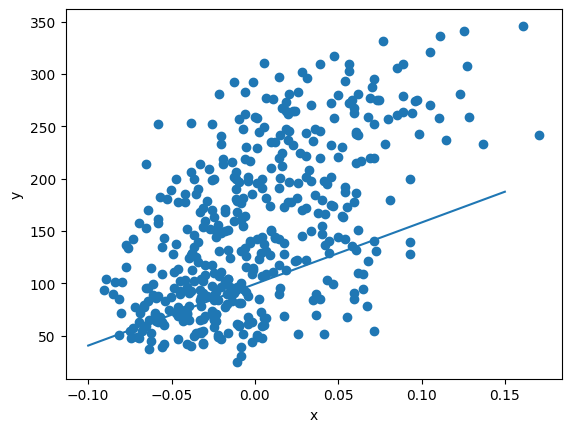

In [84]:
plt.scatter(x, y)

#좌표 평면상에서의 점찍기
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)

plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [87]:
# 여러 에포크를 100번씩 반복하기

for i in range(1, 100):
  for x_i, y_i in zip(x, y):
    y_hat = x_i * w + b
    err = y_i - y_hat
    w_rate = x_i
    w = w + w_rate * err
    b = b + 1 * err
print(w, b)

913.5973364346786 123.39414383177173


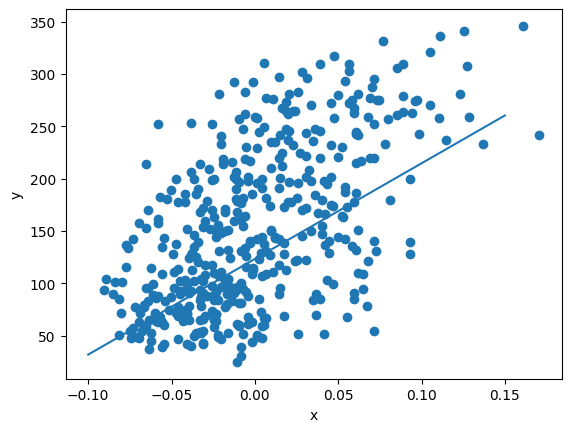

In [88]:
plt.scatter(x, y)

#좌표 평면상에서의 점찍기
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)

plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#3. 뉴런 만들기

In [90]:
class Neuron:

  def __init__(self): #가중치와 절편 초기화
    self.w = 1.0
    self.b = 1.0

  def forpass(self, x): #직선 방정식 계산
    y_hat = x*self.w + self.b
    return y_hat

  def backprop(self, x, err):
    w_grad = x*err #가중치에 대한 그래디언트 계산 -> 오차를 곱해서 w, b 값 업데이트
    b_grad = 1*err # 절편에 대한 그래디언트 계산
    return w_grad, b_grad

  def fit(self, x, y, epochs=100):
    for i in range(epochs):
      for x_i, y_i in zip(x, y):
        y_hat = self.forpass(x_i)
        err = -(y_i - y_hat) #에러에 대해 -를 붙였으므로 w_grad를 빼준다.
        w_grad, b_grad = self.backprop(x_i, err)
        self.w = self.w - w_grad
        self.b = self.b - b_grad


In [91]:
neuron = Neuron()
neuron.fit(x, y)

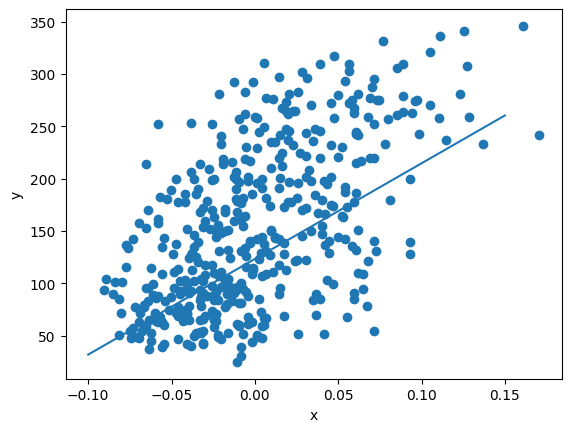

In [92]:
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * neuron.w + neuron.b)
pt2 = (0.15, 0.15 * neuron.w + neuron.b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()